In [1]:
from initial_classif.trainset.variable_training_sets import *
from initial_classif.trainset.gaia_extraction import *
import sys
from astropy.coordinates import SkyCoord
import astropy.units as u
sys.path.append('../../../')
from virac_utils import wrap, betw

from config import *
config=configuration()
config.request_password()

from interface_utils import light_curve_loader
ll = light_curve_loader.lightcurve_loader()

 ·············


In [6]:
### Good for stage 2
lcentre, bcentre, test_sizel, test_sizeb = 0.787411, -0.054603, 0.09*60., 0.09*60

In [78]:
with open(config['variable_dir']+'var_trainset_virac2.pkl', 'rb') as f:
    dsets = pickle.load(f)

## Binary classification

In [2]:
v = load_all_variable_stars(config, test=True)
# c = SkyCoord(ra=v['ra']*u.deg, dec=v['dec']*u.deg, frame='icrs').transform_to('galactic')
# v['l'], v['b'] = c.l.deg, c.b.deg
# v = v[betw(v['l'],lcentre-test_sizel*.5/60.,lcentre+test_sizel*.5/60.) & betw(v['b'],bcentre-test_sizeb*.5/60.,lcentre+test_sizeb*.5/60.)].reset_index(drop=True)
v[['virac2_id','var_class']].groupby('var_class').agg('count')

/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name sourceid is repeated in the output, new name sourceid_1 assigned
  'new name %s assigned') % (_n, curn))


,virac2_id
var_class,
EA/EB,210
EW,47
Ell,13
RRab,21
RRc,9
T2CEP,2


In [3]:
c = SkyCoord(ra=v['ra_x'].values*u.deg, dec=v['dec_x'].values*u.deg, frame='icrs').transform_to('galactic')
v['l'], v['b'] = c.l.deg, c.b.deg

In [13]:
g = generate_gaia_training_set(lcentre, bcentre, test_sizel, test_sizeb, 50., len(v), config)

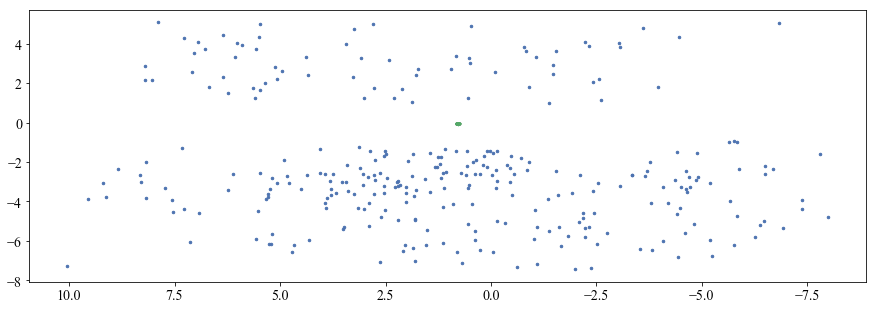

In [14]:
plt.figure(figsize=[15.,5.])
# plt.plot(wrap(v['l']),v['b'],'.',ms=0.1)
plt.plot(wrap(v['l']),v['b'],'.',ms=5)
plt.plot(wrap(g['l']),g['b'],'.',ms=1)
# plt.xlim(260.,270.)
# plt.ylim(-30,-25)
# plt.xlim(0.,2.)
# plt.ylim(-0.5,0.5)
plt.gca().invert_xaxis()

In [18]:
v['class']='VAR'
g['class']='CONST'
full_data = pd.concat([v, g], axis=0, sort=False)

In [24]:
from initial_classif.classifier.classifier import binary_classification
classfier = binary_classification(full_data)

10.620000000000001% sources removed from clip.
       ks_stetson_j
class              
CONST           272
VAR             274


In [25]:
classfier.cm

array([[230,  42],
       [ 28, 246]])

In [26]:
classfier.cr

'              precision    recall  f1-score   support\n\n       CONST       0.89      0.85      0.87       272\n         VAR       0.85      0.90      0.88       274\n\n    accuracy                           0.87       546\n   macro avg       0.87      0.87      0.87       546\nweighted avg       0.87      0.87      0.87       546\n'

In [27]:
grid_from_pickle = pickle.load(open('/local/scratch_2/jls/virac_classifier/binary/grid_test.pkl', 'rb'))
classifier_from_pickle = pickle.load(open('/local/scratch_2/jls/virac_classifier/binary/binary_0_test.pkl', 'rb'))

In [28]:
grid_from_pickle

,b,index,l
0,-0.054603,0,0.787411


In [29]:
classifier_from_pickle.feature_importance

{'ks_eta': 0.03753884349702772,
 'ks_kurtosis': 0.19421342153284102,
 'ks_mad': 0.11220030770023791,
 'ks_p100_p0': 0.024513199773047018,
 'ks_p75_p25': 0.14128473736717798,
 'ks_p84_p16': 0.10035947051787676,
 'ks_p95_p5': 0.04748091757230272,
 'ks_p99_p1': 0.025907207415144327,
 'ks_skew': 0.04332575015302972,
 'ks_stdev': 0.03737217964043344,
 'ks_stetson_i': 0.165348326058998,
 'ks_stetson_j': 0.04697692369544985,
 'ks_stetson_k': 0.023478715076433555}

In [30]:
classifier_from_pickle.cm

array([[236,  44],
       [ 34, 244]])

## Variable classification

In [84]:
from initial_classif.trainset.gaia_extraction import generate_gaia_training_set_random
constant_data = generate_gaia_training_set_random(300, config, 50., 20000)

/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name sourceid is repeated in the output, new name sourceid_1 assigned
  'new name %s assigned') % (_n, curn))


In [68]:
with open(config['variable_dir']+'var_trainset_virac2.pkl', 'rb') as f:
    dsets = pickle.load(f)

(-28.4, -28.2)

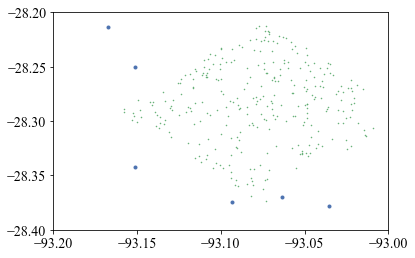

In [87]:
plt.plot(wrap(dsets['ra']),dsets['dec'],'.')
plt.plot(wrap(constant_data['ra']),constant_data['dec'],'.',ms=1)
# plt.xlim(0.72,0.89)
# plt.ylim(-0.13,0.01)
plt.xlim(-93.2,-93.)
plt.ylim(-28.4,-28.2)

In [64]:
from interface_utils.light_curve_loader import lightcurve_loader
lc = lightcurve_loader().split_lcs(constant_data)

In [67]:
len(constant_data)

300

In [95]:
tst=pd.read_csv('tmp.csv')

In [108]:
from fine_classif.classifier.classifier import variable_classification

In [110]:
v = variable_classification(tst)

28 ks_stdev
26 ks_mad
24 ks_kurtosis
23 ks_skew
23 ks_eta
22 ks_stetson_i
21 ks_stetson_j
21 ks_stetson_k
20 ks_p100_p0
20 ks_p99_p1
20 ks_p95_p5
20 ks_p84_p16
20 ks_p75_p25
19 amp_0
18 amp_1
18 amp_2
17 amp_3
17 amplitude
16 beyondfrac
15 delta_loglik
14 ls_period
14 lsq_period
14 max_pow
14 max_time_lag
13 pow_mean_disp
13 time_lag_mean
11 phi0_phi1
10 phi0_phi2
10 phi0_phi3
10 phi1_phi2
10 phi1_phi3
10 phi2_phi3
10 a0_a1
9 a0_a2
9 a0_a3
9 a1_a2
9 a1_a3
9 a2_a3
8 JK_col
7 HK_col
328.57% sources removed from clip.
       phi0_phi2
class           
CONST          7


ValueError: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=7.

In [115]:
p = pd.read_pickle('/local/scratch_2/jls/virac_classifier/binary/grid_test.pkl')

In [116]:
p

,b,index,l
0,-0.054603,0,0.787411


In [117]:
tst = pd.read_pickle('/local/scratch_2/jls/virac_classifier/results/results_0_test.pkl')

In [125]:
int('0')

0

In [127]:
tst = generate_gaia_training_set(1.,1.,2.,2.,50.,1000,config)

In [123]:
config['test']='1'

In [127]:
with open('/local/scratch_2/jls/virac_classifier/binary/binary_0_test.pkl', 'rb') as f:
    t = pickle.load(f)

In [169]:
classes = np.array(['VAR','VAR','CONST'])
class_dict = dict(zip(['CONST','VAR'],np.arange(2)))
b = np.random.normal(size=(3,2))

In [170]:
b[np.arange(len(classes)), [class_dict[clss] for clss in classes]]

array([-0.36893198,  1.25270691,  0.19033256])

In [168]:
b

array([[-0.13619717, -0.15439786],
       [-0.99182342, -1.31643136],
       [ 1.12551183,  0.83146233]])

In [175]:
main_table_cols = ['sourceid','ra','dec','l','b']
main_string = 't.'+',t.'.join(main_table_cols)

In [176]:
main_string

't.sourceid,t.ra,t.dec,t.l,t.b'

In [146]:
with open('/local/scratch_2/jls/virac_classifier/variable/results_test.pkl', 'rb') as f:
    b = pickle.load(f)

In [151]:
np.count_nonzero(b['JK_col']!=b['JK_col'])

0

In [276]:
with open('/local/scratch_2/jls/virac_classifier/results/results_0_test.pkl', 'rb') as f:
    t = pickle.load(f)

In [42]:
from classify import grab_virac_with_stats

In [68]:
with open(config['variable_dir']+'var_trainset_virac2.pkl', 'rb') as f:
    dsets = pickle.load(f)

In [155]:
len(dsets)

681282

In [81]:
from virac_utils import wsdb_kwargs
del wsdb_kwargs['asDict']

In [94]:
sqlutil.upload('jason_sanders.variable_training_set_virac2',
               (dsets['virac2_id'].values, dsets['cat_id'].values.astype(str), dsets['var_class'].values.astype(str),
                dsets['cat_period'].values, dsets['ra'].values, dsets['dec'].values),
               ['virac_id', 'cat_id', 'var_class', 'cat_period', 'ra', 'dec'], **wsdb_kwargs)

In [141]:
config['test']='0'

In [ ]:
full_variable_set = load_all_variable_stars(config)

In [152]:
len(full_variable_set)

405008

In [161]:
def dtype_transform(x):
    if x.dtype=='O':
        return x.astype(str)
    else:
        return x

In [163]:
sqlutil.upload('jason_sanders.variable_training_set_virac2_stats',
               (dtype_transform(full_variable_set[X].values) for X in full_variable_set.columns),
               full_variable_set.columns, **wsdb_kwargs)

ValueError: The dimension of bins must be equal to the dimension of the  sample x.

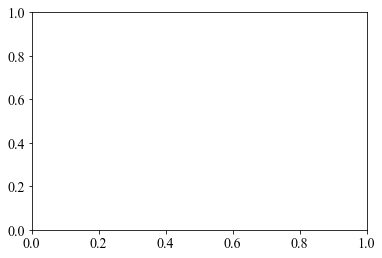

In [268]:
plt.hist2d(full_variable_set['j_b_ivw_mean_mag']-full_variable_set['ks_b_ivw_mean_mag'],full_variable_set['ks_b_ivw_mean_mag'],'.',ms=0.1);
plt.xlim(-0.5,3.)

In [269]:
tmp = pd.read_csv('tmp.csv')

In [173]:
features = ["ks_stdev","ks_mad","ks_kurtosis","ks_skew",
           "ks_eta",#"ks_eta_e",
           "ks_stetson_i","ks_stetson_j","ks_stetson_k",
           "ks_p100_p0","ks_p99_p1","ks_p95_p5","ks_p84_p16","ks_p75_p25"]

In [275]:
from astropy.config import get_config_filename

ImportError: cannot import name 'get_config_filename'

(array([ 9., 30., 88., 47., 15.,  4.,  2.,  2.,  0.,  2.]),
 array([-1.78096008, -1.58484134, -1.3887226 , -1.19260386, -0.99648512,
        -0.80036638, -0.60424765, -0.40812891, -0.21201017, -0.01589143,
         0.18022731]),
 <a list of 10 Patch objects>)

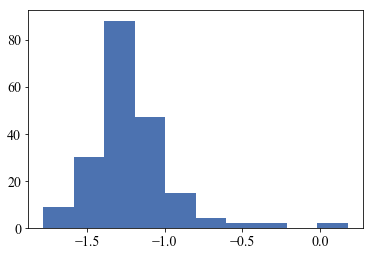

In [272]:
plt.hist(tmp['HK_col'])

In [207]:
np.count_nonzero(tmp['ks_p100_p0']>0.), len(tmp)

(10446, 10446)

In [230]:
tmp.columns

Index(['Unnamed: 0', 'amp_0', 'amp_1', 'amp_2', 'amp_3', 'amplitude',
       'beyondfrac', 'delta_loglik', 'error', 'kurt', 'ls_period',
       'lsq_period', 'max_pow', 'max_time_lag', 'mean', 'med_magdev', 'phi_0',
       'phi_1', 'phi_2', 'phi_3', 'pow_mean_disp', 'sd', 'skew', 'sourceid',
       'time_lag_mean', 'ra', 'dec', 'l', 'b', 'ks_n_detections', 'ks_stdev',
       'ks_mad', 'ks_kurtosis', 'ks_skew', 'ks_eta', 'ks_stetson_i',
       'ks_stetson_j', 'ks_stetson_k', 'ks_p100', 'ks_p0', 'ks_p99', 'ks_p1',
       'ks_p95', 'ks_p5', 'ks_p84', 'ks_p16', 'ks_p75', 'ks_p25',
       'j_b_ivw_mean_mag', 'h_b_ivw_mean_mag', 'ks_b_ivw_mean_mag',
       'sep_arcsec', 'phot_g_mean_flux_over_error', 'phot_g_mean_mag',
       'phot_g_n_obs', 'ks_p75_p25', 'ks_p84_p16', 'ks_p95_p5', 'ks_p99_p1',
       'ks_p100_p0', 'g_amp', 'binpct_g_amp', 'var_class', 'varcat_period',
       'JK_col', 'HK_col', 'phi0_phi1', 'phi0_phi2', 'phi0_phi3', 'phi1_phi2',
       'phi1_phi3', 'phi2_phi3', 'a0_a1', 'a0

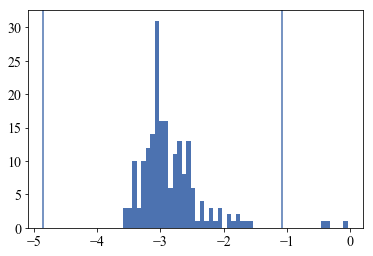

In [243]:
f='JK_col'
lgg = lambda x: np.log10(x)
lgg = lambda x: x
plt.hist(lgg(tmp[f]).replace(np.inf,np.nan),bins=50);
sigma = 0.25*np.diff(np.nanpercentile(lgg(tmp[f]).replace(np.inf,np.nan),[5.,95.]))[0]
med = np.nanpercentile(lgg(tmp[f]).replace(np.inf,np.nan),50.)
plt.axvline(med-5*sigma)
plt.axvline(med+5*sigma)

In [ ]:
from fine_classif.feat_extract.extinction_map import extinction_map_healpix
extM = extinction_map_healpix('/data/jls/virac/virac_extinction_map_healpix', version='v2_NEW_JK_PHOTSTATS_FULL')

In [285]:
with open('/local/scratch_2/jls/virac_classifier/binary/binary_0.pkl', 'rb') as f:
    tst_binary = pickle.load(f)

In [173]:
!ls -lt /local/scratch_2/jls/virac_classifier/binary/binary_0_test.pkl
!ls -lt /local/scratch_2/jls/virac_classifier/binary/grid_test.pkl

-rw-r--r-- 1 jls jls 4156439 Nov  6 15:55 /local/scratch_2/jls/virac_classifier/binary/binary_0_test.pkl
-rw-r--r-- 1 jls jls 865 Nov  6 15:55 /local/scratch_2/jls/virac_classifier/binary/grid_test.pkl


In [292]:
tst_binary.cm

array([[369382,  28040],
       [ 41220, 353084]])

In [295]:
tst_binary.feature_importance

{'ks_eta': 0.1339301027020682,
 'ks_kurtosis': 0.010448421582510593,
 'ks_mad': 0.0373652908117867,
 'ks_p100_p0': 0.0158200495127549,
 'ks_p75_p25': 0.05374757818441779,
 'ks_p84_p16': 0.069329214005771,
 'ks_p95_p5': 0.03363431714718332,
 'ks_p99_p1': 0.022093867508251437,
 'ks_skew': 0.02330607340161878,
 'ks_stdev': 0.06533688132560019,
 'ks_stetson_i': 0.2955339619520921,
 'ks_stetson_j': 0.2204977729103944,
 'ks_stetson_k': 0.018956468955550487}

In [211]:
import pickle
with open('/local/scratch_2/jls/virac_classifier/binary/binary_0_test.pkl', 'rb') as f:
    tst_binary_0 = pickle.load(f)

In [212]:
tst_binary_0.training_set.loc[tst_binary_0.training_set['detailed_var_class']!=tst_binary_0.training_set['detailed_var_class'], 'detailed_var_class']='CONST'

In [213]:
tst_binary_0.feature_importance

{'ks_eta': 312,
 'ks_kurtosis': 179,
 'ks_mad': 238,
 'ks_p100_p0': 162,
 'ks_p75_p25': 91,
 'ks_p84_p16': 134,
 'ks_p95_p5': 167,
 'ks_p99_p1': 165,
 'ks_skew': 220,
 'ks_stdev': 134,
 'ks_stetson_i': 496,
 'ks_stetson_j': 402,
 'ks_stetson_k': 300}

In [214]:
for ss in list(set(np.unique(tst_binary_0.training_set['detailed_var_class']))-set(['CONST'])):
    print(ss,np.count_nonzero((tst_binary_0.training_set['class']=='CONST')&(tst_binary_0.training_set['detailed_var_class']==ss))/
              np.count_nonzero((tst_binary_0.training_set['detailed_var_class']==ss)))

DSCT 0.6
T2CEP 0.038461538461538464
EA/EB 0.13871280483257514
RRc 0.22509225092250923
RRd 0.0
SRV 0.0
Ell 0.22172949002217296
RRab 0.03361344537815126
OSARG 0.5
CEP 0.0
EW 0.06350626118067978


In [177]:
for ss in list(set(np.unique(tst_binary_0.training_set['detailed_var_class']))-set(['CONST'])):
    print(ss,np.count_nonzero((tst_binary_0.training_set['class']=='CONST')&(tst_binary_0.training_set['detailed_var_class']==ss))/
              np.count_nonzero((tst_binary_0.training_set['detailed_var_class']==ss)))

DSCT 0.6
T2CEP 0.038461538461538464
EA/EB 0.13863822805578344
RRc 0.21955719557195572
RRd 0.0
SRV 0.0
Ell 0.21507760532150777
RRab 0.027754415475189236
OSARG 0.4523809523809524
CEP 0.0
EW 0.06799880703847301


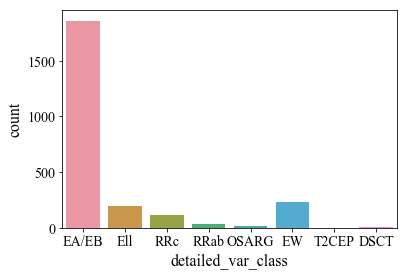

In [178]:
sns.countplot(tst_binary_0.training_set['detailed_var_class'][
    (tst_binary_0.training_set['class']=='CONST')&(tst_binary_0.training_set['var_class']=='VAR')])

[]

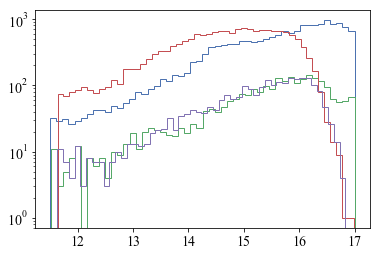

In [179]:
plt.hist(tst_binary_0.training_set['ks_b_ivw_mean_mag'][
    (tst_binary_0.training_set['var_class']=='VAR')&(tst_binary_0.training_set['class']=='VAR')],bins=50,histtype='step');
plt.hist(tst_binary_0.training_set['ks_b_ivw_mean_mag'][
    (tst_binary_0.training_set['var_class']=='VAR')&(tst_binary_0.training_set['class']=='CONST')],bins=50,histtype='step');
plt.hist(tst_binary_0.training_set['ks_b_ivw_mean_mag'][
    (tst_binary_0.training_set['var_class']=='CONST')&(tst_binary_0.training_set['class']=='CONST')],bins=50,histtype='step');
plt.hist(tst_binary_0.training_set['ks_b_ivw_mean_mag'][
    (tst_binary_0.training_set['var_class']=='CONST')&(tst_binary_0.training_set['class']=='VAR')],bins=50,histtype='step');
plt.semilogy()

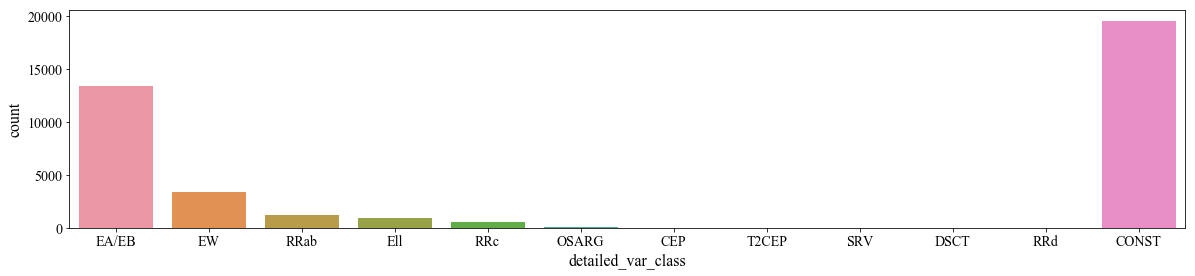

In [180]:
plt.figure(figsize=[20.,4.])
sns.countplot(tst_binary_0.training_set['detailed_var_class'])

/data/jls/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


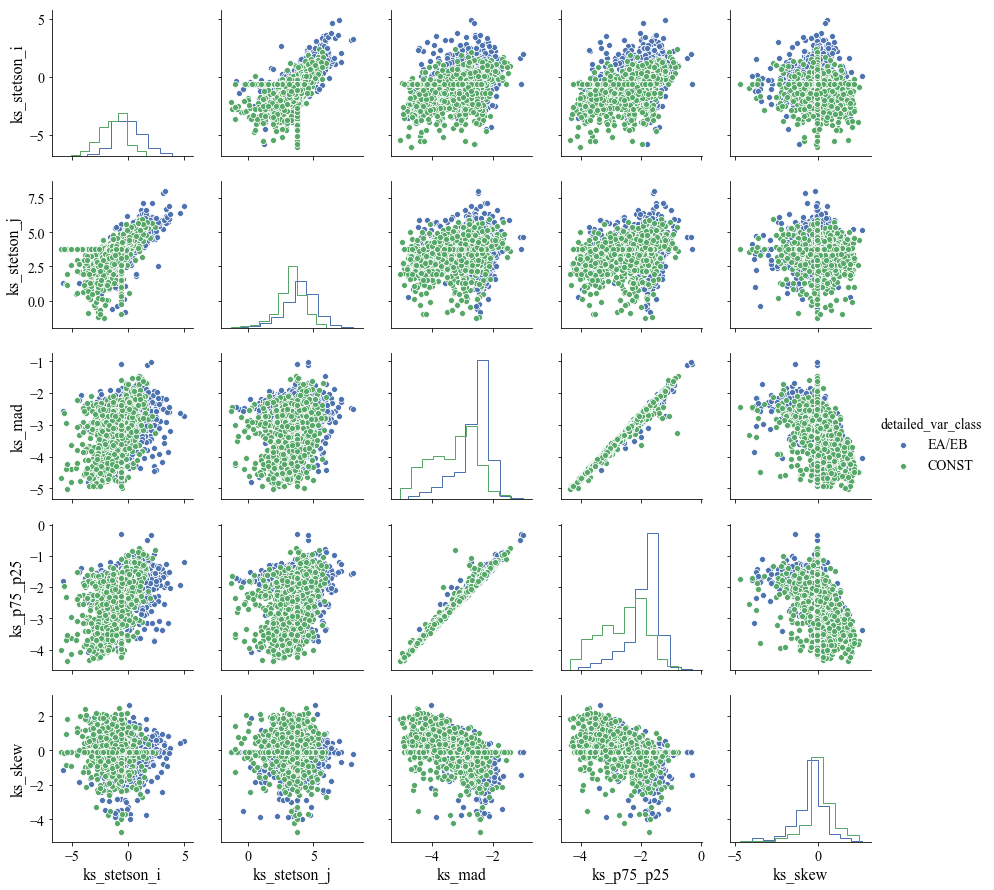

In [181]:
import seaborn as sns
df = tst_binary_0.training_set[['ks_stetson_i','ks_stetson_j','ks_mad',
                                'ks_p75_p25','detailed_var_class','var_class','ks_skew']].sample(2000)
df = df[np.isin(df['detailed_var_class'],['CONST','EA/EB'])]
sns.pairplot(df,
             hue='detailed_var_class',diag_kind='hist',diag_kws={'histtype':'step','normed':True})

In [182]:
tst_binary_0.cr

{'CONST': {'f1-score': 0.8766515329286334,
  'precision': 0.8749554503334861,
  'recall': 0.8783542039355993,
  'support': 19565},
 'VAR': {'f1-score': 0.8756940160394818,
  'precision': 0.8774080560420315,
  'recall': 0.8739866598255516,
  'support': 19490},
 'accuracy': 0.8761746255281014,
 'macro avg': {'f1-score': 0.8761727744840576,
  'precision': 0.8761817531877588,
  'recall': 0.8761704318805754,
  'support': 39055},
 'weighted avg': {'f1-score': 0.8761736938767947,
  'precision': 0.8761793982341276,
  'recall': 0.8761746255281014,
  'support': 39055}}

In [183]:
tst_binary_0.cm

array([[17185,  2380],
       [ 2456, 17034]])

[]

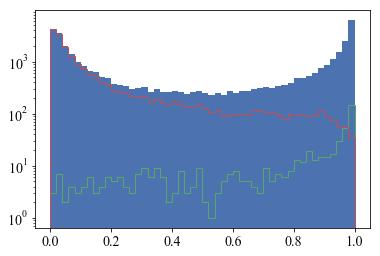

In [206]:
plt.hist(np.float64(tst_binary_0.training_set['prob_var'].values),range=[0,1],bins=50);

plt.hist(np.float64(tst_binary_0.training_set['prob_var'].values)[tst_binary_0.training_set['detailed_var_class']=='RRc'],
         range=[0,1],bins=50,histtype='step');

plt.hist(np.float64(tst_binary_0.training_set['prob_var'].values)[tst_binary_0.training_set['var_class']=='CONST'],
         range=[0,1],bins=50,histtype='step');

plt.semilogy()